## Pancreas - processing genes - supplementary figures

In [12]:
### load libraries

# standard libraries
import numpy as np

# single-cell libraries
import scvelo as scv
import anndata as ad
import scanpy as sc

# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing the parameters of the scVelo figures

# import our own functions
import velocity

### Load original dataset


In [13]:
### load pancreas dataset
dataset_path = "../datasets/pancreas/pancreas.h5ad"
adata = ad.read_h5ad(dataset_path)

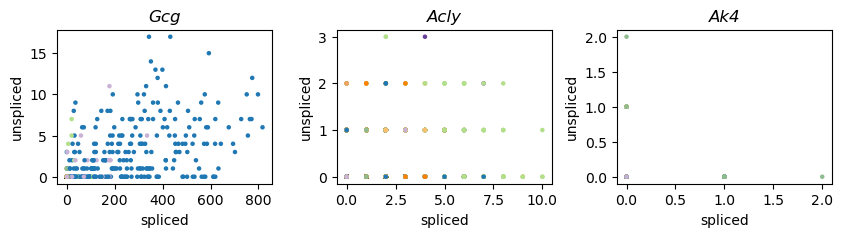

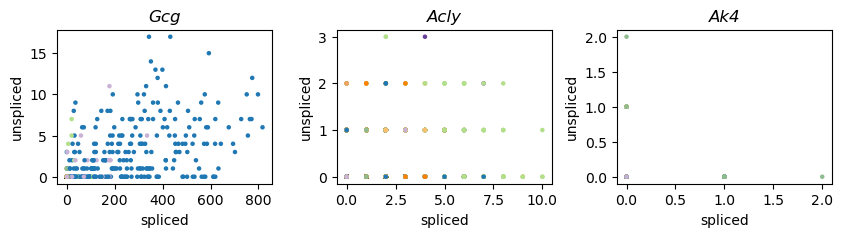

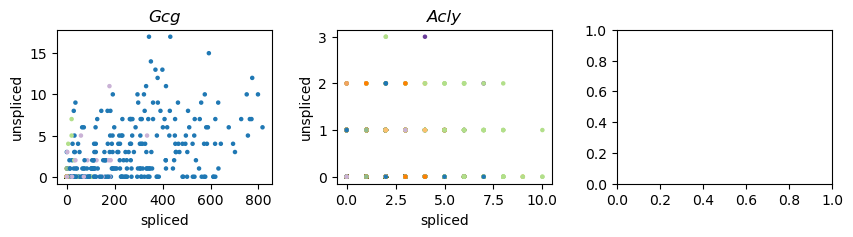

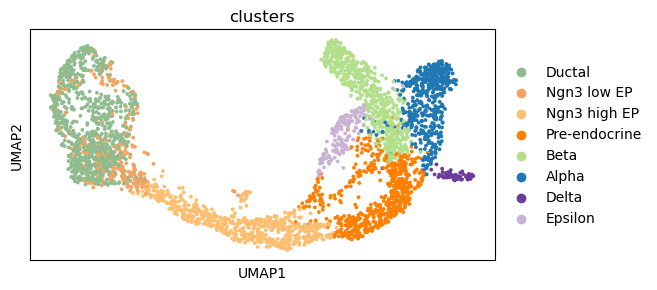

In [14]:
### plot dataset
fig, axs = plt.subplots(1, 1, figsize=(6, 3), frameon=False)
sc.pl.umap(adata, color="clusters", size=30, ax=axs)

In [15]:
### convert matrices from sparse to dense
adata.X = adata.X.todense()
adata.layers['spliced'] = adata.layers['spliced'].todense()
adata.layers['unspliced'] = adata.layers['unspliced'].todense()

In [16]:
### select HVGs
hvgs = velocity.pp.filtering.get_hvgs(adata, no_of_hvgs=5000, theta=100, layer='spliced')

In [17]:
### select genes 
test_genes = ['Gcg','Acly','Ak4']

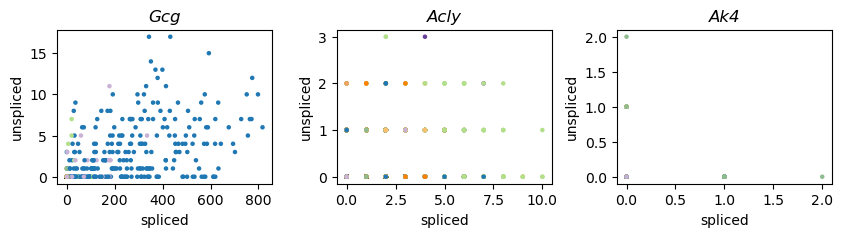

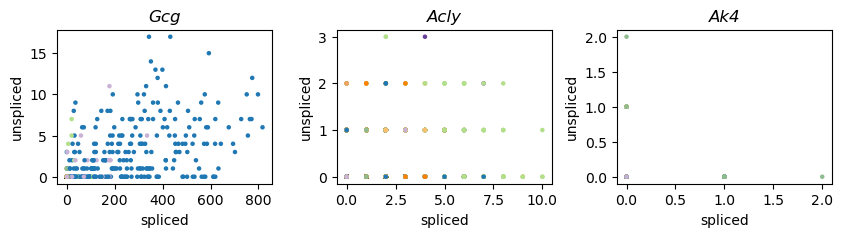

In [19]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/hvgs_example.png"
plt.savefig(save_path, dpi=300, transparent=False)
plt.show()

In [20]:
print("Subsetting to top " + str(len(hvgs)) + " highly-variable genes.")
adata = adata[:, hvgs]

Subsetting to top 5000 highly-variable genes.


In [21]:
### subset for genes that have high enough U and S counts
minlim = 4
us_genes = velocity.pp.filtering.get_high_us_genes(adata, minlim_u=minlim, minlim_s=minlim)
len(us_genes)

406

In [22]:
### select genes 
test_genes = ['Gcg', 'Mt2', 'Ctsz']

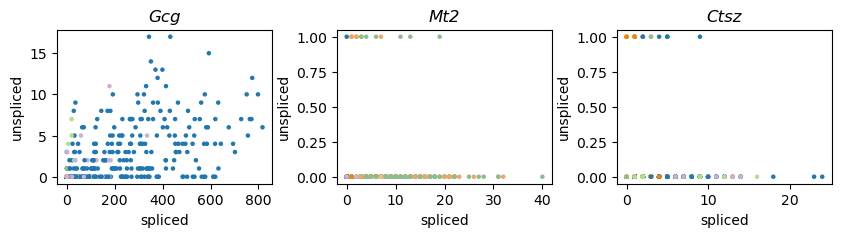

In [23]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/us_genes_example.png"
plt.savefig(save_path, dpi=300, transparent=False)
plt.show()

In [24]:
print("Subsetting to " + str(len(us_genes)) + " genes with sufficient S and U counts.")
adata = adata[:,us_genes]

Subsetting to 406 genes with sufficient S and U counts.


In [25]:
### L1 normalise unspliced and spliced together with size vector
velocity.pp.normalisation.normalise_layers(adata, mode='combined', norm='L1')

total_counts not given


In [26]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Ptov1']

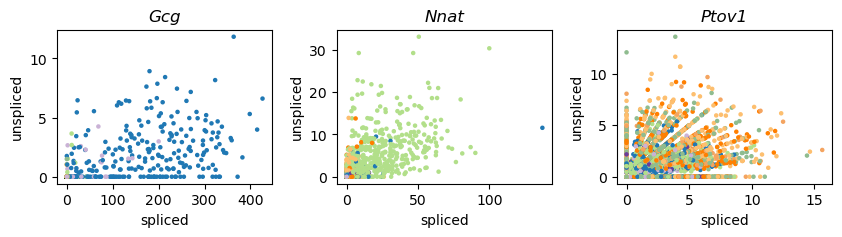

In [29]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/normalisation_example.png"
plt.savefig(save_path, dpi=300, transparent=False)
plt.show()

In [30]:
### imputation
velocity.pp.imputation.impute_counts(adata, n_neighbours = 30, layer_NN = 'spliced', n_pcs = 15)

In [31]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Ptov1']

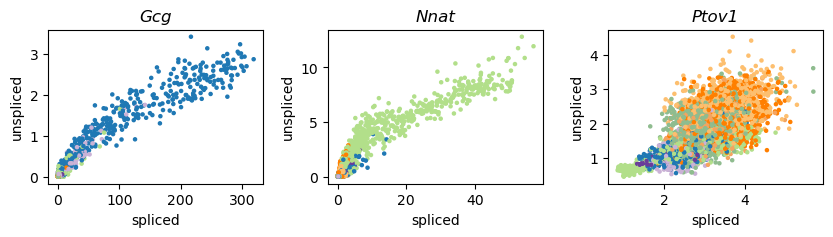

In [32]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["Ms"], adata[:,gene].layers["Mu"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/imputation_example.png"
plt.savefig(save_path, dpi=300, transparent=False)
plt.show()

### Recover reaction rate parameters

In [33]:
### recover dynamics for selected genes
velocity.tl.fit.recover_reaction_rate_pars(adata, use_raw=False, n=100, fit_kappa=True, fit_scaling=True)

In [34]:
copy_ = adata.copy()

In [35]:
adata = copy_.copy()

### Additional filtering steps


In [36]:
### remove likelihood genes
likelihood_genes = adata.var['fit_likelihood'].sort_values(ascending=False)
likelihood_genes = likelihood_genes.dropna()
likelihood_genes = likelihood_genes[likelihood_genes >= 0.4]
likelihood_genes = likelihood_genes.index.values
len(likelihood_genes)

376

In [37]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Dnmt3a']

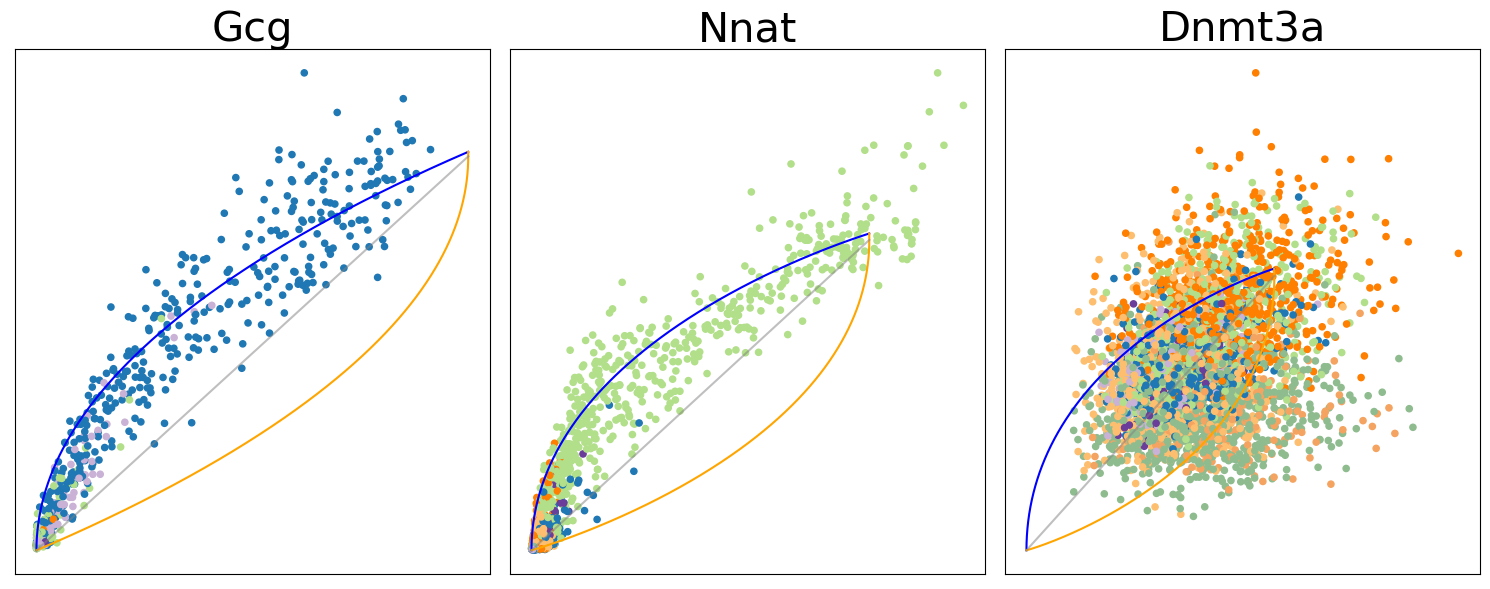

In [38]:
save_path = "../figures/gene_processing/likelihood_example.png"
velocity.pl.kinetics.scatter(adata, test_genes, save=save_path)

In [39]:
print(str(len(likelihood_genes))+" high-likelihood genes kept")
adata = adata[:, likelihood_genes]

376 high-likelihood genes kept


In [40]:
### set prior state on genes
connections_dict = {'Alpha': ['Pre-endocrine'],
                  'Beta': ['Pre-endocrine'],
                  'Delta': ['Pre-endocrine'],
                  'Epsilon': ['Pre-endocrine'],
                  'Pre-endocrine': ['Ngn3 high EP'],
                  'Ngn3 high EP': ['Ductal'],
                  'Ngn3 high EP': [ 'Ngn3 low EP']}

velocity.tl.prior.set_prior_state(adata, connections_dict)

In [41]:
### find all genes where prior state matches the retrieved state
matching_genes = velocity.tl.filtering.get_matching_state_genes(adata, perc_match=60)
len(matching_genes)

138

In [42]:
### select genes 
test_genes = ['Gcg', 'Dock11', 'Ghrl']

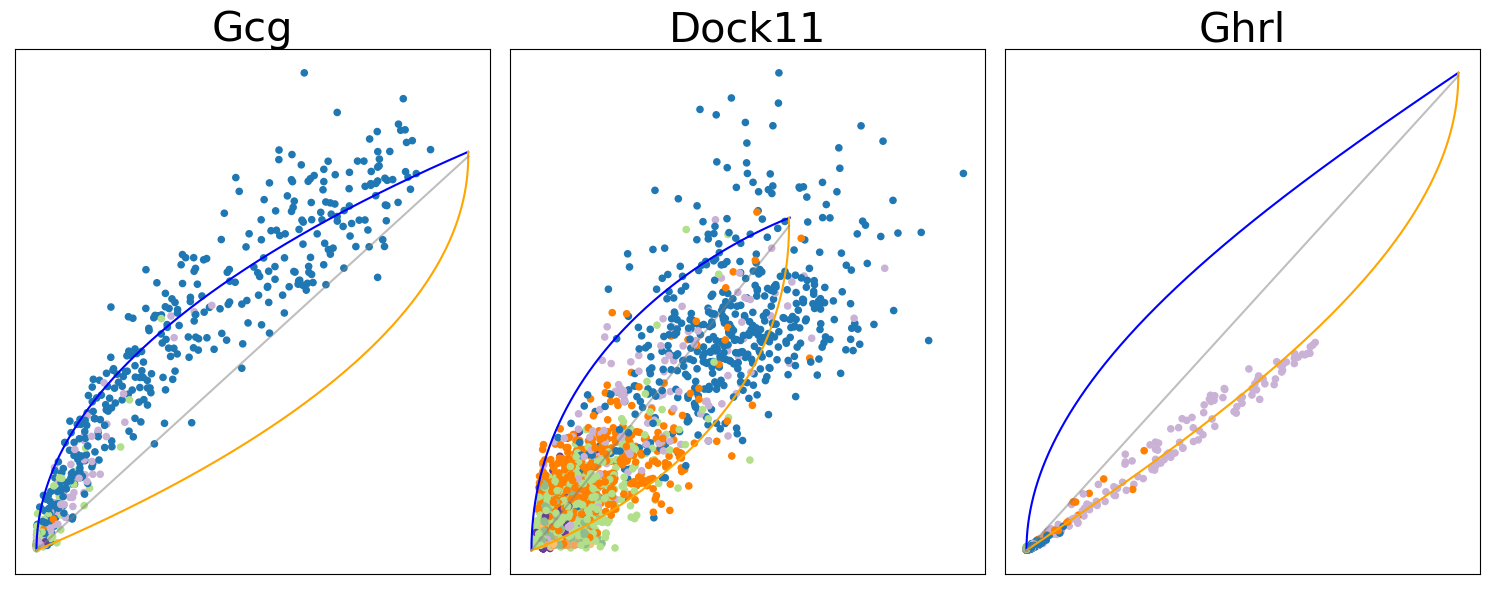

In [43]:
save_path = "../figures/gene_processing/prior_example.png"
velocity.pl.kinetics.scatter(adata, test_genes, save=save_path)

In [44]:
print(str(len(matching_genes))+" prior state matching genes kept")
adata = adata[:, matching_genes]

138 prior state matching genes kept
